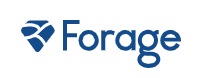

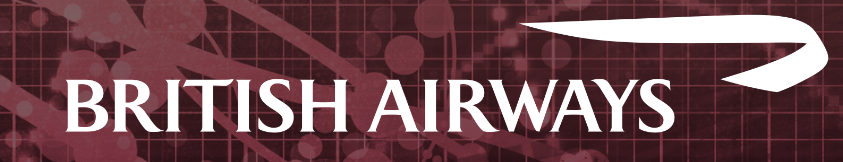

# This is Task One of The Forage Vertual Internship Data Science Project For BRITISH AIRWAYS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import statsmodels as sm

I Scraped the below data using data miner extention as its relatively easy to get data . than Beautiful soup or Scrapy

In [ ]:
data = pd.read_csv('/content/british Airways 1200.csv')

# UNDERSTANDING THE DATA

In [ ]:
data.head()

,airline_name,author,author_country,review_date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,British Airways,E Smyth,(United Kingdom),13th August 2023,✅ Trip Verified | Easy check in a T5. Galleri...,A380,Family Leisure,Business Class,London to Miami,8,4.0,5.0,5.0,5.0,4.0,5.0,4,yes
1,British Airways,D Daly,(United States),12th August 2023,"Not Verified | Flight delayed by an hour, it ...",NaN,Family Leisure,Economy Class,London to Paris,2,1.0,1.0,NaN,NaN,1.0,NaN,1,no
2,British Airways,Karima Saci,(United Kingdom),11th August 2023,Not Verified | The staff are very rude and not...,NaN,Family Leisure,Economy Class,London to Algiers,2,1.0,1.0,1.0,1.0,1.0,1.0,1,no
3,British Airways,S Deynal,(United Kingdom),8th August 2023,✅ Trip Verified | Good domestic flight operat...,Embraer-190,Couple Leisure,Economy Class,Edinburgh to London City,10,4.0,4.0,3.0,NaN,5.0,NaN,5,yes
4,British Airways,Branko Stolz,(Canada),8th August 2023,Not Verified | Failed at all basic travel fund...,NaN,Solo Leisure,Economy Class,London to Vienna,1,3.0,3.0,NaN,NaN,1.0,NaN,2,no


In [ ]:
data.describe()

,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating
count,1200.000000,1114.000000,1106.000000,957.000000,658.000000,1142.000000,314.000000,1200.000000
mean,4.263333,2.783662,3.196203,2.699060,2.778116,2.704904,2.216561,2.460833
std,3.271020,1.373888,1.522805,1.474089,1.436428,1.526727,1.511694,1.474317
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,2.000000
75%,7.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   airline_name                   1200 non-null   object 
 1   author                         1200 non-null   object 
 2   author_country                 1200 non-null   object 
 3   review_date                    1200 non-null   object 
 4   content                        1200 non-null   object 
 5   aircraft                       683 non-null    object 
 6   type_traveller                 1199 non-null   object 
 7   cabin_flown                    1200 non-null   object 
 8   route                          1197 non-null   object 
 9   overall_rating                 1200 non-null   int64  
 10  seat_comfort_rating            1114 non-null   float64
 11  cabin_staff_rating             1106 non-null   float64
 12  food_beverages_rating          957 non-null    f

In [ ]:
data.isnull().sum()

airline_name                       0
author                             0
author_country                     0
review_date                        0
content                            0
aircraft                         517
type_traveller                     1
cabin_flown                        0
route                              3
overall_rating                     0
seat_comfort_rating               86
cabin_staff_rating                94
food_beverages_rating            243
inflight_entertainment_rating    542
ground_service_rating             58
wifi_connectivity_rating         886
value_money_rating                 0
recommended                        0
dtype: int64

# Data Pre-Processing

In [ ]:

columns_to_select = ['aircraft', 'inflight_entertainment_rating', 'wifi_connectivity_rating', 'food_beverages_rating', 'cabin_staff_rating', 'seat_comfort_rating']
selected_columns = data[columns_to_select]


In [ ]:
selected_columns

,aircraft,inflight_entertainment_rating,wifi_connectivity_rating,food_beverages_rating,cabin_staff_rating,seat_comfort_rating
0,A380,5.0,5.0,5.0,5.0,4.0
1,NaN,NaN,NaN,NaN,1.0,1.0
2,NaN,1.0,1.0,1.0,1.0,1.0
3,Embraer-190,NaN,NaN,3.0,4.0,4.0
4,NaN,NaN,NaN,NaN,3.0,3.0
...,...,...,...,...,...,...
1195,NaN,NaN,NaN,1.0,4.0,3.0
1196,NaN,NaN,NaN,NaN,5.0,5.0
1197,Boeing 747-400,1.0,1.0,3.0,3.0,2.0
1198,A320,NaN,NaN,5.0,4.0,1.0


In [ ]:
# Remove rows with missing values in important columns
data.dropna(subset=['airline_name', 'author', 'review_date', 'type_traveller', 'cabin_flown', 'route', 'recommended','ground_service_rating','cabin_staff_rating','food_beverages_rating'], inplace=True)


In [ ]:
data.isnull().sum()

airline_name                       0
author                             0
author_country                     0
review_date                        0
content                            0
aircraft                         334
type_traveller                     0
cabin_flown                        0
route                              0
overall_rating                     0
seat_comfort_rating                0
cabin_staff_rating                 0
food_beverages_rating              0
inflight_entertainment_rating    305
ground_service_rating              0
wifi_connectivity_rating         649
value_money_rating                 0
recommended                        0
dtype: int64

### Removeing columns like aircraft as i cant possibly find the aircraft which was used . I'm also dropping wifi_connectivity_rating as i dont know wether the wifi was available in flight or not .Also dropping inflight_entertainment_rating

In [ ]:
# Remove unnecessary columns
data.drop(['aircraft','inflight_entertainment_rating','wifi_connectivity_rating'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

airline_name             0
author                   0
author_country           0
review_date              0
content                  0
type_traveller           0
cabin_flown              0
route                    0
overall_rating           0
seat_comfort_rating      0
cabin_staff_rating       0
food_beverages_rating    0
ground_service_rating    0
value_money_rating       0
recommended              0
dtype: int64

In [ ]:
data.head()

,airline_name,author,author_country,review_date,content,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,ground_service_rating,value_money_rating,recommended
0,British Airways,E Smyth,(United Kingdom),13th August 2023,✅ Trip Verified | Easy check in a T5. Galleri...,Family Leisure,Business Class,London to Miami,8,4.0,5.0,5.0,4.0,4,yes
2,British Airways,Karima Saci,(United Kingdom),11th August 2023,Not Verified | The staff are very rude and not...,Family Leisure,Economy Class,London to Algiers,2,1.0,1.0,1.0,1.0,1,no
3,British Airways,S Deynal,(United Kingdom),8th August 2023,✅ Trip Verified | Good domestic flight operat...,Couple Leisure,Economy Class,Edinburgh to London City,10,4.0,4.0,3.0,5.0,5,yes
5,British Airways,G Maysev,(Poland),8th August 2023,✅ Trip Verified | They lost my baggage in a v...,Business,Economy Class,San Francisco to Warsaw via London,1,3.0,5.0,4.0,1.0,1,no
6,British Airways,R Heirten,(United Kingdom),5th August 2023,✅ Trip Verified | Late boarding led to a one ...,Business,Economy Class,Frankfurt to London City,1,3.0,3.0,1.0,1.0,1,no


In [ ]:
column_name_mapping = {
    'airline_name': 'airline',
    'author': 'review_author',
    'author_country': 'author_country',
    'review_date': 'date_of_review',
    'content': 'review_content',
    'type_traveller': 'traveller_type',
    'cabin_flown': 'cabin_class',
    'route': 'flight_route',
    'overall_rating': 'overall_rating',
    'seat_comfort_rating': 'seat_comfort_rating',
    'cabin_staff_rating': 'cabin_staff_rating',
    'food_beverages_rating': 'food_beverages_rating',
    'ground_service_rating': 'ground_service_rating',
    'value_money_rating': 'value_for_money_rating',
    'recommended': 'recommended'
}

data.rename(columns=column_name_mapping, inplace=True)


In [ ]:
data.head()

,airline,review_author,author_country,date_of_review,review_content,traveller_type,cabin_class,flight_route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,ground_service_rating,value_for_money_rating,recommended
0,British Airways,E Smyth,(United Kingdom),13th August 2023,✅ Trip Verified | Easy check in a T5. Galleri...,Family Leisure,Business Class,London to Miami,8,4.0,5.0,5.0,4.0,4,yes
2,British Airways,Karima Saci,(United Kingdom),11th August 2023,Not Verified | The staff are very rude and not...,Family Leisure,Economy Class,London to Algiers,2,1.0,1.0,1.0,1.0,1,no
3,British Airways,S Deynal,(United Kingdom),8th August 2023,✅ Trip Verified | Good domestic flight operat...,Couple Leisure,Economy Class,Edinburgh to London City,10,4.0,4.0,3.0,5.0,5,yes
5,British Airways,G Maysev,(Poland),8th August 2023,✅ Trip Verified | They lost my baggage in a v...,Business,Economy Class,San Francisco to Warsaw via London,1,3.0,5.0,4.0,1.0,1,no
6,British Airways,R Heirten,(United Kingdom),5th August 2023,✅ Trip Verified | Late boarding led to a one ...,Business,Economy Class,Frankfurt to London City,1,3.0,3.0,1.0,1.0,1,no


####**Changeing data type of date of review column to datetime **

In [ ]:
import re
from datetime import datetime

# Function to remove ordinal indicators from the date string
def remove_ordinal_indicators(date_str):
    return re.sub(r'\b(\d+)(st|nd|rd|th)\b', r'\1', date_str)

# Function to convert the date format
def convert_date_format(date_str):
    date_obj = datetime.strptime(remove_ordinal_indicators(date_str), '%d %B %Y')
    return date_obj.strftime('%d-%m-%Y')

# Apply the function to the "date_of_review" column
data['date_of_review'] = data['date_of_review'].apply(convert_date_format)


In [ ]:
data.head()

,airline,review_author,author_country,date_of_review,review_content,traveller_type,cabin_class,flight_route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,ground_service_rating,value_for_money_rating,recommended
0,British Airways,E Smyth,(United Kingdom),13-08-2023,✅ Trip Verified | Easy check in a T5. Galleri...,Family Leisure,Business Class,London to Miami,8,4.0,5.0,5.0,4.0,4,yes
2,British Airways,Karima Saci,(United Kingdom),11-08-2023,Not Verified | The staff are very rude and not...,Family Leisure,Economy Class,London to Algiers,2,1.0,1.0,1.0,1.0,1,no
3,British Airways,S Deynal,(United Kingdom),08-08-2023,✅ Trip Verified | Good domestic flight operat...,Couple Leisure,Economy Class,Edinburgh to London City,10,4.0,4.0,3.0,5.0,5,yes
5,British Airways,G Maysev,(Poland),08-08-2023,✅ Trip Verified | They lost my baggage in a v...,Business,Economy Class,San Francisco to Warsaw via London,1,3.0,5.0,4.0,1.0,1,no
6,British Airways,R Heirten,(United Kingdom),05-08-2023,✅ Trip Verified | Late boarding led to a one ...,Business,Economy Class,Frankfurt to London City,1,3.0,3.0,1.0,1.0,1,no


In [ ]:
data['cabin_class'].unique()

array(['Business Class', 'Economy Class', 'Premium Economy',
       'First Class'], dtype=object)

## Removeing the unwanted Special Characters And Some Text (Trip Verified , not Verified )


In [ ]:
import re
import regex

# Define a cleaning function for text
def clean_text(text):
    # Remove special characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Remove emojis
    cleaned_text = regex.sub(r'\p{Emoji}', '', cleaned_text)

    return cleaned_text

# Apply the cleaning function to the 'review_content' column using .loc
data.loc[:, 'review_content'] = data['review_content'].apply(clean_text)


data['review_content'] = data['review_content'].str.replace('Trip Verified', '')
data['review_content'] = data['review_content'].str.replace('Not Verified', '')



In [ ]:
data.head()

,airline,review_author,author_country,date_of_review,review_content,traveller_type,cabin_class,flight_route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,ground_service_rating,value_for_money_rating,recommended
0,British Airways,E Smyth,(United Kingdom),13-08-2023,Easy check in a T Galleries south and Nort...,Family Leisure,Business Class,London to Miami,8,4.0,5.0,5.0,4.0,4,yes
2,British Airways,Karima Saci,(United Kingdom),11-08-2023,The staff are very rude and not trained prop...,Family Leisure,Economy Class,London to Algiers,2,1.0,1.0,1.0,1.0,1,no
3,British Airways,S Deynal,(United Kingdom),08-08-2023,Good domestic flight operated by BA Cityfl...,Couple Leisure,Economy Class,Edinburgh to London City,10,4.0,4.0,3.0,5.0,5,yes
5,British Airways,G Maysev,(Poland),08-08-2023,They lost my baggage in a very simple situ...,Business,Economy Class,San Francisco to Warsaw via London,1,3.0,5.0,4.0,1.0,1,no
6,British Airways,R Heirten,(United Kingdom),05-08-2023,Late boarding led to a one hour flight lea...,Business,Economy Class,Frankfurt to London City,1,3.0,3.0,1.0,1.0,1,no


In [ ]:
! pip install transformers
from transformers import AutoTokenizer


# USING THE PRETRAINED RoBERTA BASE SentimentMODEL FROM HUGGING FACE



In [ ]:
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
review_data = data[['review_content']].copy()  ## I Created a seperate data frame for centimentanalysis


In [ ]:
review_data.head()

,review_content
0,Easy check in a T Galleries south and Nort...
2,The staff are very rude and not trained prop...
3,Good domestic flight operated by BA Cityfl...
5,They lost my baggage in a very simple situ...
6,Late boarding led to a one hour flight lea...


In [ ]:
example = review_data.iloc[0]

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(MODEL)
# Get the content of the first review from the DataFrame
example = review_data.iloc[0]['review_content']

# Tokenize the example
encoded_text = tokenizer.encode_plus(example, return_tensors='pt', padding=True, truncation=True, max_length=512)
print(encoded_text)

{'input_ids': tensor([[    0,  1437,  1437,  1437, 18609,  1649,    11,    10,   255,  7155,
          9709,  2077,     8,   369, 26120,  2590,   293,  6515,   129,    95,
           441,     7,   120,    10,  2418,  6553,  3999,  1095,   251,    25,
           163, 14213, 18437,   203, 32170, 13275, 22250, 17359,     8,    15,
            86,    83,  2853,  9124,  3470,   950,   232, 14591,    61,    16,
          1786,     7,  1046,    10,   410,   635,   101,     5,   739, 19735,
            15,    42,  3054,  1907, 36581,  3419,    58,    70,  5500,   509,
           284,    56,  2903,   743,    19,    49,  3202,     8,  4000,  1743,
            61,  3419,  1006,   543,    15,   600, 16748,   396,  1282,  3652,
             8,  4076,  1735,    58,    70,   182,   205,  5528,    21,   205,
          7806,    41, 18260,  2524,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.016093913, 'roberta_neu': 0.075813204, 'roberta_pos': 0.9080929}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(MODEL)

# List to store encoded texts
encoded_texts = []

# Iterate over each review's content
for content in review_data['review_content']:
    # Tokenize the content
    encoded_text = tokenizer.encode_plus(content, return_tensors='pt', padding=True, truncation=True, max_length=512)
    encoded_texts.append(encoded_text)

# 'encoded_texts' is now a list of dictionaries containing tokenized representations
print(encoded_texts)

[{'input_ids': tensor([[    0,  1437,  1437,  1437, 18609,  1649,    11,    10,   255,  7155,
          9709,  2077,     8,   369, 26120,  2590,   293,  6515,   129,    95,
           441,     7,   120,    10,  2418,  6553,  3999,  1095,   251,    25,
           163, 14213, 18437,   203, 32170, 13275, 22250, 17359,     8,    15,
            86,    83,  2853,  9124,  3470,   950,   232, 14591,    61,    16,
          1786,     7,  1046,    10,   410,   635,   101,     5,   739, 19735,
            15,    42,  3054,  1907, 36581,  3419,    58,    70,  5500,   509,
           284,    56,  2903,   743,    19,    49,  3202,     8,  4000,  1743,
            61,  3419,  1006,   543,    15,   600, 16748,   396,  1282,  3652,
             8,  4076,  1735,    58,    70,   182,   205,  5528,    21,   205,
          7806,    41, 18260,  2524,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:

from scipy.special import softmax
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

# Process each encoded text and get sentiment predictions
sentiment_predictions = []

for encoded_text in encoded_texts:
    output = model(**encoded_text)
    logits = output.logits
    scores = softmax(logits[0].detach().numpy())  # Apply softmax to get probabilities
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2]
    }
    sentiment_predictions.append(scores_dict)

# sentiment_predictions now contains sentiment scores for each review
for idx, scores_dict in enumerate(sentiment_predictions):
    print(f"Review {idx + 1} sentiment scores:", scores_dict)


Review 1 sentiment scores: {'roberta_neg': 0.016093913, 'roberta_neu': 0.075813204, 'roberta_pos': 0.9080929}
Review 2 sentiment scores: {'roberta_neg': 0.9820141, 'roberta_neu': 0.015986405, 'roberta_pos': 0.0019994273}
Review 3 sentiment scores: {'roberta_neg': 0.0026877518, 'roberta_neu': 0.028450398, 'roberta_pos': 0.9688618}
Review 4 sentiment scores: {'roberta_neg': 0.8468927, 'roberta_neu': 0.13898325, 'roberta_pos': 0.014124068}
Review 5 sentiment scores: {'roberta_neg': 0.5847467, 'roberta_neu': 0.3841321, 'roberta_pos': 0.031121183}
Review 6 sentiment scores: {'roberta_neg': 0.003509046, 'roberta_neu': 0.022701757, 'roberta_pos': 0.9737892}
Review 7 sentiment scores: {'roberta_neg': 0.29519, 'roberta_neu': 0.5172245, 'roberta_pos': 0.18758553}
Review 8 sentiment scores: {'roberta_neg': 0.03780525, 'roberta_neu': 0.20507593, 'roberta_pos': 0.7571188}
Review 9 sentiment scores: {'roberta_neg': 0.35972774, 'roberta_neu': 0.3879405, 'roberta_pos': 0.2523317}
Review 10 sentiment s

## Counting the Positive Negative And Neutral Rating Then Converting it to Percentage

In [ ]:
# Initialize counters
positive_count = 0
negative_count = 0
neutral_count = 0

# Iterate through sentiment predictions
for scores_dict in sentiment_predictions:
    # Determine the sentiment class based on scores
    sentiment_class = max(scores_dict, key=scores_dict.get)

    # Increment the respective counter
    if sentiment_class == 'roberta_pos':
        positive_count += 1
    elif sentiment_class == 'roberta_neg':
        negative_count += 1
    else:
        neutral_count += 1

# Print the counts
print("Positive reviews:", positive_count)
print("Negative reviews:", negative_count)
print("Neutral reviews:", neutral_count)


Positive reviews: 341
Negative reviews: 530
Neutral reviews: 85


In [ ]:
# Calculate total number of reviews
total_reviews = len(sentiment_predictions)

# Calculate percentages
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

# Print the percentages
print("Positive reviews: {:.2f}%".format(positive_percentage))
print("Negative reviews: {:.2f}%".format(negative_percentage))
print("Neutral reviews: {:.2f}%".format(neutral_percentage))


Positive reviews: 35.67%
Negative reviews: 55.44%
Neutral reviews: 8.89%


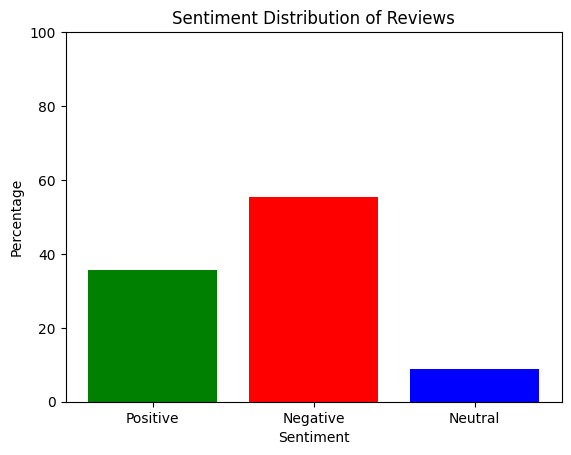

In [ ]:
import matplotlib.pyplot as plt

# Sentiment labels and percentages
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sentiment_percentages = [positive_percentage, negative_percentage, neutral_percentage]

# Create a bar plot
plt.bar(sentiment_labels, sentiment_percentages, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution of Reviews')
plt.ylim(0, 100)  # Set y-axis limit to 0-100 for percentages
plt.show()


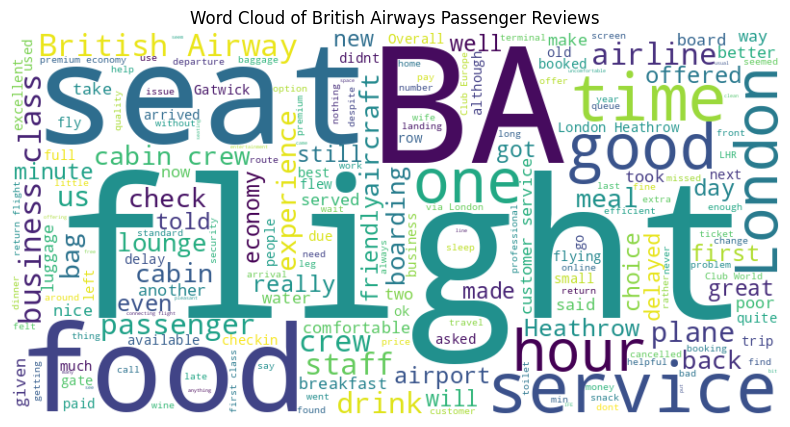

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
all_reviews_text = " ".join(review_data['review_content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of British Airways Passenger Reviews')
plt.show()


## The code Below performs a text analysis and visualization of key topics in a collection of reviews

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


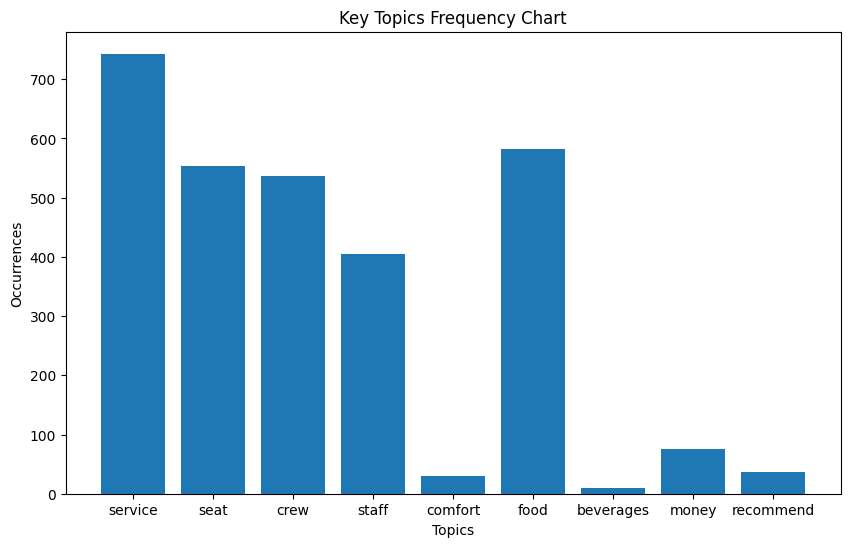

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Combine all review content into a single string
all_reviews = ' '.join(data['review_content'])

# Tokenize words and remove stopwords
stop_words = set(stopwords.words('english'))
words = word_tokenize(all_reviews)
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Define the key topics
key_topics = ['service', 'seat', 'crew', 'staff','comfort','food','beverages','money','recommend']

# Count occurrences of key topics
topic_counts = Counter(filtered_words)

# Create a DataFrame for the key topics and their occurrences
topic_df = pd.DataFrame({'Topic': key_topics, 'Occurrences': [topic_counts.get(topic, 0) for topic in key_topics]})

# Create a frequency chart using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(topic_df['Topic'], topic_df['Occurrences'])
plt.xlabel('Topics')
plt.ylabel('Occurrences')
plt.title('Key Topics Frequency Chart')
plt.show()


# I will Also Be doing a First class, Business class , Economy Class Wise Detailed Sentiment Analysis on this Data Set